In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Importing the dataset.

data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin =1')
data.head()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [129]:
data.shape

(181691, 135)

In [130]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'State','natlty1_txt':'nationality_of_target','weaptype1_txt':'WeaponType','nkill':'killed','nwound':'wounded'},inplace=True)

In [131]:
data.head()

,eventid,year,month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [132]:
data.info

<bound method DataFrame.info of              eventid  year  month  day approxdate  extended resolution  \
0       197000000001  1970      7    2        NaN         0        NaN   
1       197000000002  1970      0    0        NaN         0        NaN   
2       197001000001  1970      1    0        NaN         0        NaN   
3       197001000002  1970      1    0        NaN         0        NaN   
4       197001000003  1970      1    0        NaN         0        NaN   
...              ...   ...    ...  ...        ...       ...        ...   
181686  201712310022  2017     12   31        NaN         0        NaN   
181687  201712310029  2017     12   31        NaN         0        NaN   
181688  201712310030  2017     12   31        NaN         0        NaN   
181689  201712310031  2017     12   31        NaN         0        NaN   
181690  201712310032  2017     12   31        NaN         0        NaN   

        country             Country  region  ... addnotes  \
0            58  D

In [133]:
data.describe()

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
#checking the null values

data.isnull().sum()

eventid            0
year               0
month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [135]:
#here we are cleaning the data
#removing the null values, missing values..


modifieddata=data.fillna("")

In [136]:
modifieddata.isnull().sum()

eventid       0
year          0
month         0
day           0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [137]:
modifieddata = data.dropna()

In [138]:
modifieddata.isnull().sum()

eventid       0.0
year          0.0
month         0.0
day           0.0
approxdate    0.0
             ... 
INT_LOG       0.0
INT_IDEO      0.0
INT_MISC      0.0
INT_ANY       0.0
related       0.0
Length: 135, dtype: float64

In [139]:
data['country'].value_counts()

95     24636
153    14368
4      12731
92     11960
45      8306
       ...  
422        1
226        1
428        1
7          1
10         1
Name: country, Length: 205, dtype: int64

In [140]:
data['nationality_of_target'].value_counts() 

Iraq                              24113
Pakistan                          13900
India                             12098
Afghanistan                       10931
Colombia                           7922
                                  ...  
People's Republic of the Congo        1
Saba (Netherlands Antilles)           1
Tuvalu                                1
Western Sahara                        1
Marshall Islands                      1
Name: nationality_of_target, Length: 215, dtype: int64

In [141]:
data['eventid'].value_counts() 

197000000001    1
201309100037    1
201309110023    1
201309110024    1
201309110026    1
               ..
199510030007    1
199510030008    1
199510030009    1
199510040001    1
201712310032    1
Name: eventid, Length: 181691, dtype: int64

In [142]:
per_region_killed=data.groupby(['eventid', 'Region'],as_index=False)['killed']
per_region_killed.sum()

,eventid,Region,killed
0,197000000001,Central America & Caribbean,1.0
1,197000000002,North America,0.0
2,197001000001,Southeast Asia,1.0
3,197001000002,Western Europe,0.0
4,197001000003,East Asia,0.0
...,...,...,...
181686,201712310022,Sub-Saharan Africa,1.0
181687,201712310029,Middle East & North Africa,2.0
181688,201712310030,Southeast Asia,0.0
181689,201712310031,South Asia,0.0


In [143]:
per_region_killed.max()


,eventid,Region,killed
0,197000000001,Central America & Caribbean,1.0
1,197000000002,North America,0.0
2,197001000001,Southeast Asia,1.0
3,197001000002,Western Europe,NaN
4,197001000003,East Asia,NaN
...,...,...,...
181686,201712310022,Sub-Saharan Africa,1.0
181687,201712310029,Middle East & North Africa,2.0
181688,201712310030,Southeast Asia,0.0
181689,201712310031,South Asia,0.0


In [144]:
#sum of all killed cases
data["killed"].sum()

411868.0

In [145]:
#sum of all woundeded cases
data['wounded'].sum()

523869.0

Text(0, 0.5, 'killed')

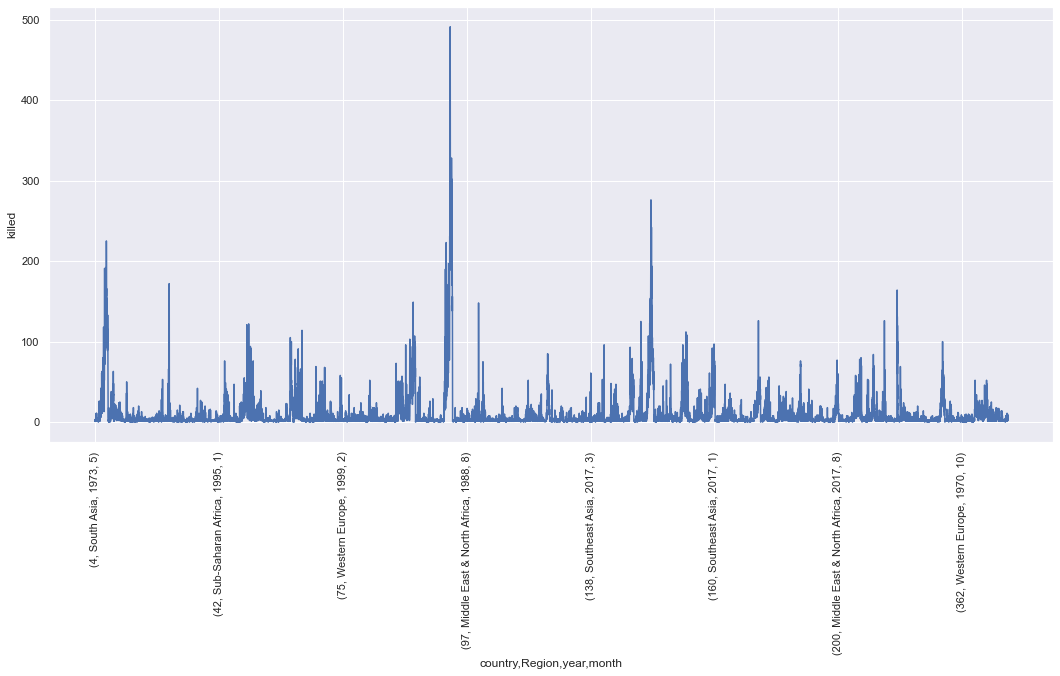

In [146]:
plt.subplots(figsize=(18,8))
data.groupby(['country', 'Region', 'year', 'month']).count()['killed'].plot()
plt.xticks(rotation=90)
plt.ylabel("killed")

In [147]:
data=data.sort_values(by='killed',ascending=False)[:60]
worst=data.pivot_table(index='Country',columns='year',values='killed')
worst.fillna(0,inplace=True)
worst.head()

year,1978,1980,1983,1984,1985,1986,1987,1988,1994,1996,...,2001,2004,2006,2007,2009,2012,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,266.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

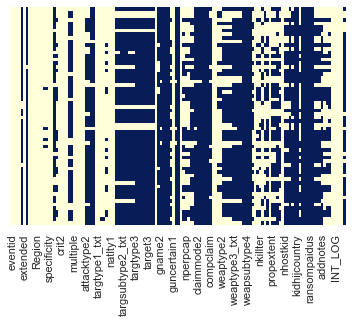

In [148]:
sns.heatmap(data.isnull() , yticklabels=False , cbar=False , cmap='YlGnBu')

In [149]:
missing=data[data.isnull().any(axis=1)]
missing.shape

(60, 135)

In [150]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['killed'].max(),'that took place in',data.loc[data['killed'].idxmax()].Country)
print("Nationality of the maximally targetted group is:", data['nationality_of_target'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Nationality of the maximally targetted group is: Iraq


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


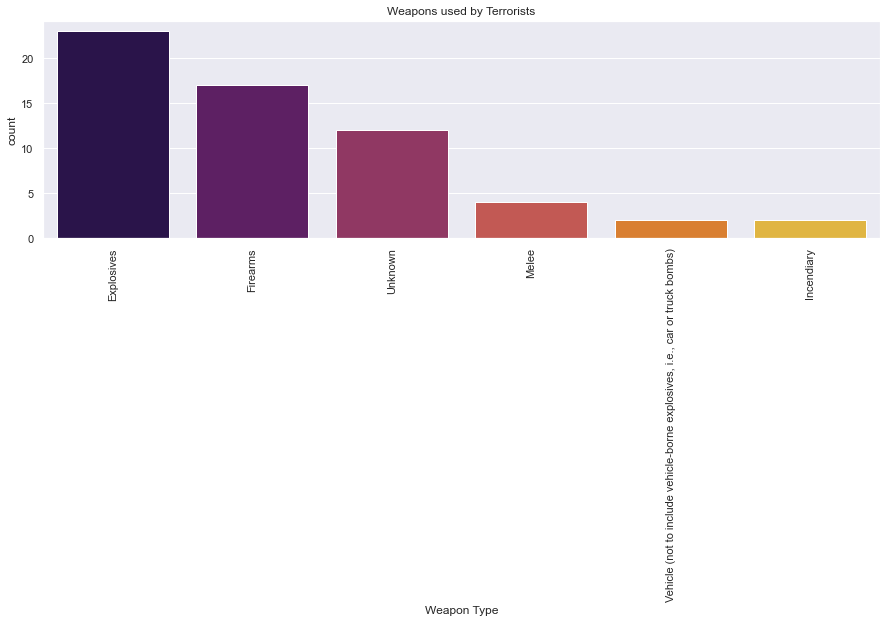

In [151]:
#Count of the weapons used in these attacks

plt.subplots(figsize=(15,4))
sns.countplot('WeaponType',data=data,palette='inferno',order=data['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

0    47
1    13
Name: suicide, dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Suicide Outcome')

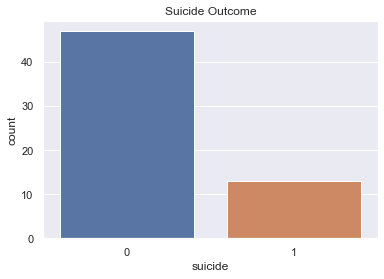

In [152]:
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid")
print(data.suicide.value_counts())
sns.countplot('suicide',data=data).set_title('Suicide Outcome')

0    48
1    12
Name: extended, dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Success Outcome')

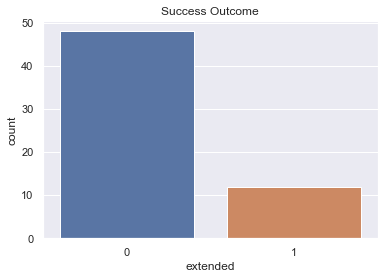

In [153]:
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid")
print(data.extended.value_counts())
sns.countplot('extended',data=data).set_title('Success Outcome')

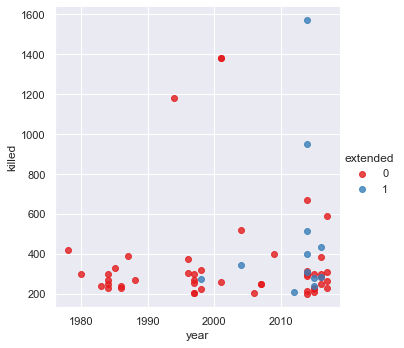

In [154]:
sns.lmplot(x='year',y='killed',data=data,fit_reg=False,hue='extended',legend=True,palette="Set1")

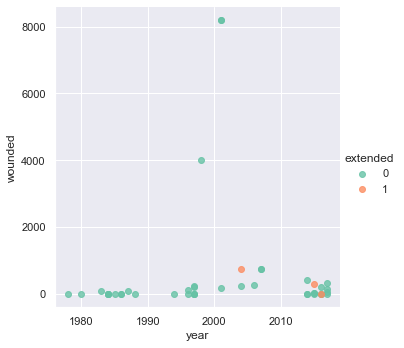

In [155]:
sns.lmplot(x='year',y='wounded',data=data,fit_reg=False,hue='extended',legend=True,palette="Set2")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


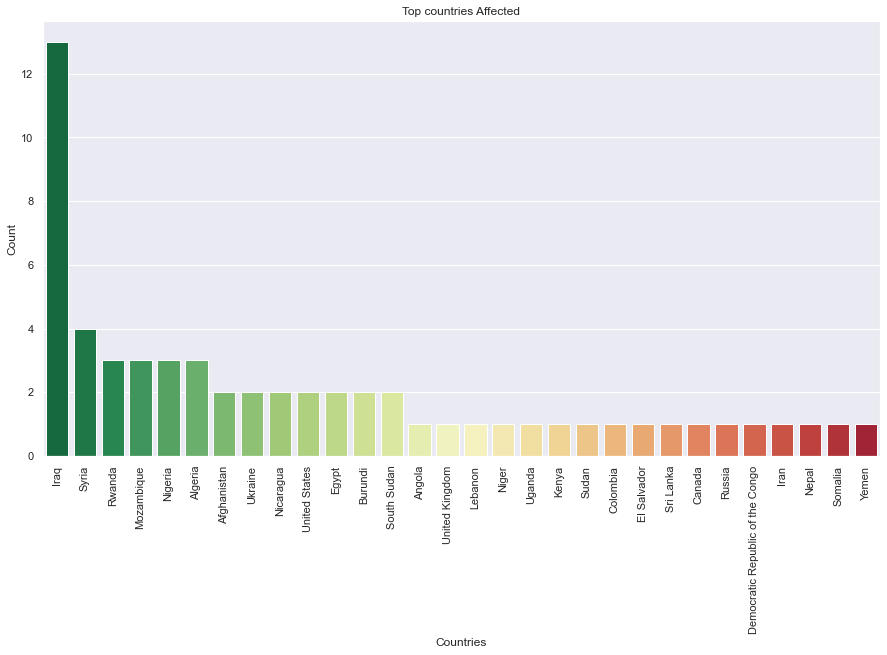

In [156]:
plt.subplots(figsize=(15,8))
sns.barplot(data['Country'].value_counts()[:30].index,data['Country'].value_counts()[:30].values,palette='RdYlGn_r')
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()


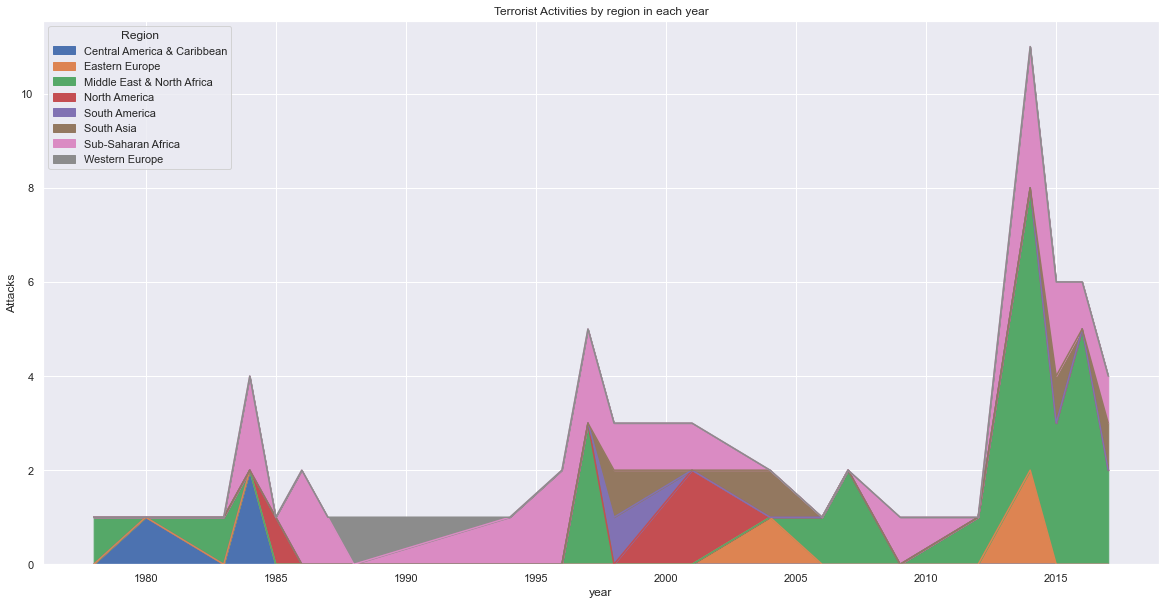

In [157]:
data_region=pd.crosstab(data.year,data.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()